# General REDCOMETS test
- It can't handle multivariate time series (the ones that got mutliple channels)

In [1]:
import sys, os
sys.path.append(os.path.abspath('..'))

from helpers import *
from Redcomets import REDCOMETS
from aeon.datasets import load_unit_test
from aeon.datasets import load_gunpoint
from aeon.datasets import load_basic_motions

## Unit Test 

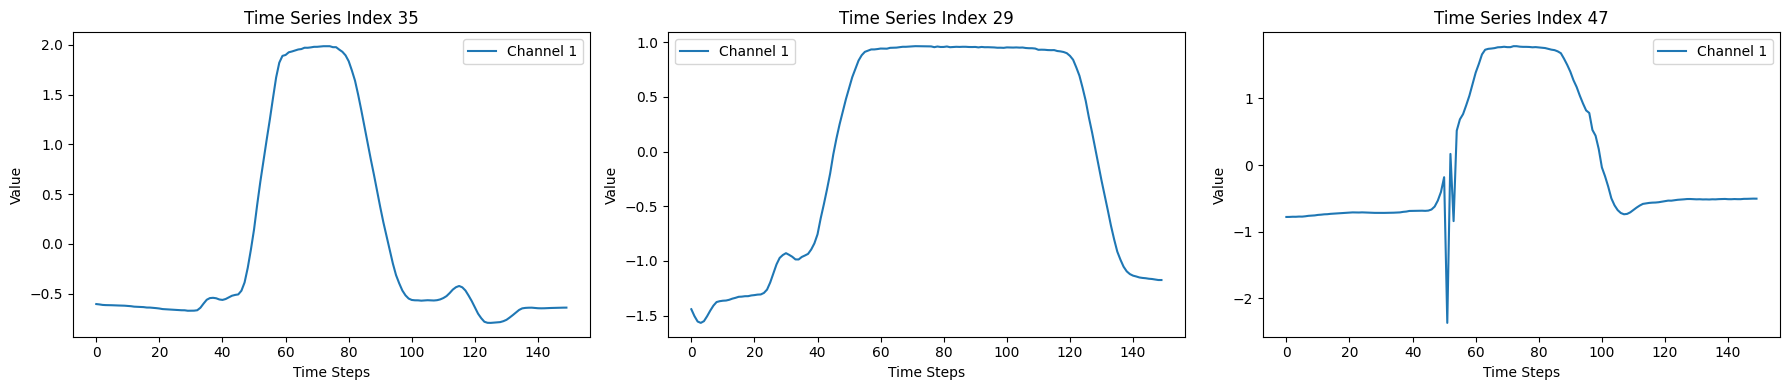

In [2]:
# Load Data
Xtrain, ytrain = load_gunpoint(split="TRAIN")
#Xtrain, ytrain = load_basic_motions(split="TRAIN")
#Xtrain, ytrain = load_unit_test(split="train")


Xtest, ytest = load_gunpoint(split="TEST")
#Xtest, ytest = load_basic_motions(split="TEST")
#Xtest, ytest = load_unit_test(split="test")

#Plot them
plot_random_time_series(Xtrain, n = 3)

In [3]:
clf = REDCOMETS(variant = 3)  
clf.fit(Xtrain, ytrain)  

y_pred = clf.predict(Xtest)  

In [4]:
clf.sax_clfs

[(RandomForestClassifier(n_jobs=1), np.float64(0.9218181818181819)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.9218181818181819)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.9218181818181819)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.8854545454545455)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.9418181818181818)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.9272727272727274)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.8454545454545455))]

In [5]:
clf.get_ensemble_proximities(Xtrain, group = "all")

array([[1.        , 0.45006928, 0.11320727, ..., 0.2715892 , 0.06232679,
        0.14709584],
       [0.45006928, 1.        , 0.10302685, ..., 0.44241484, 0.08569861,
        0.18052685],
       [0.11320727, 0.10302685, 1.        , ..., 0.19483689, 0.36723152,
        0.06341657],
       ...,
       [0.2715892 , 0.44241484, 0.19483689, ..., 1.        , 0.1236403 ,
        0.083125  ],
       [0.06232679, 0.08569861, 0.36723152, ..., 0.1236403 , 1.        ,
        0.04022373],
       [0.14709584, 0.18052685, 0.06341657, ..., 0.083125  , 0.04022373,
        1.        ]])

## Static Variable Testing

In [6]:
#Generate random static variables to test algorithm
Xstatic = np.random.rand(Xtrain.shape[0], 45)
Xstatic_test = np.random.rand(Xtest.shape[0], 45)

#To test if None works
# Xstatic = None
# Xstatic_test = None

In [7]:
Xtrain.shape

(50, 1, 150)

In [8]:
rc = REDCOMETS(variant = 3, static = Xstatic)  
rc.fit(Xtrain, ytrain)  

REDCOMETS(static=array([[0.5162648 , 0.82161311, 0.0869738 , ..., 0.39705406, 0.0146285 ,
        0.93928148],
       [0.08102741, 0.38481516, 0.94175107, ..., 0.36417939, 0.86785231,
        0.75530526],
       [0.95161383, 0.39899433, 0.73861649, ..., 0.76526777, 0.21607636,
        0.46398279],
       ...,
       [0.59835921, 0.42596556, 0.3143542 , ..., 0.74467738, 0.58394462,
        0.59731216],
       [0.33195236, 0.71261416, 0.37118846, ..., 0.11356955, 0.54326188,
        0.01420041],
       [0.74992708, 0.80965171, 0.93434568, ..., 0.01794438, 0.49155741,
        0.99753016]]))

In [9]:
static_prox = rc.get_ensemble_proximities(Xtrain, group = "all")
static_prox

array([[1.        , 0.35943993, 0.12865482, ..., 0.34381218, 0.12658714,
        0.21164975],
       [0.35943993, 1.        , 0.16793063, ..., 0.40629272, 0.15412521,
        0.20976142],
       [0.12865482, 0.16793063, 1.        , ..., 0.15917936, 0.36435871,
        0.08311844],
       ...,
       [0.34381218, 0.40629272, 0.15917936, ..., 1.        , 0.16118613,
        0.16016582],
       [0.12658714, 0.15412521, 0.36435871, ..., 0.16118613, 1.        ,
        0.09655499],
       [0.21164975, 0.20976142, 0.08311844, ..., 0.16016582, 0.09655499,
        1.        ]])

In [10]:
rc = REDCOMETS(variant = 3, static = None)  
rc.fit(Xtrain, ytrain)  

no_static_prox = rc.get_ensemble_proximities(Xtrain, group = "all")

#Compare the two proximities
print(f"Shape of Xtrain: ", Xtrain.shape)
print("Shape of static_prox: ", static_prox.shape)
print("Shape of no_static_prox: ", no_static_prox.shape)
static_prox == no_static_prox

Shape of Xtrain:  (50, 1, 150)
Shape of static_prox:  (50, 50)
Shape of no_static_prox:  (50, 50)


array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False,  True]])

# Testing Shape Concerns
Why does it add extra rows

In [11]:
# Testing
rc = REDCOMETS(variant = 3, static = None, debug_mode=True)  
rc.fit(Xtrain, ytrain)  

min_neighbours: 24
max_neighbours: 26


X_smote shape: (52, 150)
y_smote shape: (52,)


X_sfa shape: (52, 7)
X_sfa shape: (52, 46)
X_sfa shape: (52, 111)
X_sfa shape: (52, 3)
X_sfa shape: (52, 118)
X_sfa shape: (52, 45)
X_sfa shape: (52, 41)


REDCOMETS(debug_mode=True)